Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Info] Number of positive: 906, number of negative: 1115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 2021, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448293 -> initscore=-0.207570
[LightGBM] [Info] Start training from score -0.207570
Mejores hiperparámetros encontrados: {'feature_fraction': 0.6, 'learning_rate': 0.01, 'max_depth': 20, 'min_child_samples': 10, 'n_estimators': 20, 'num_leaves': 40, 'subsample': 0.8}
Mejor score en

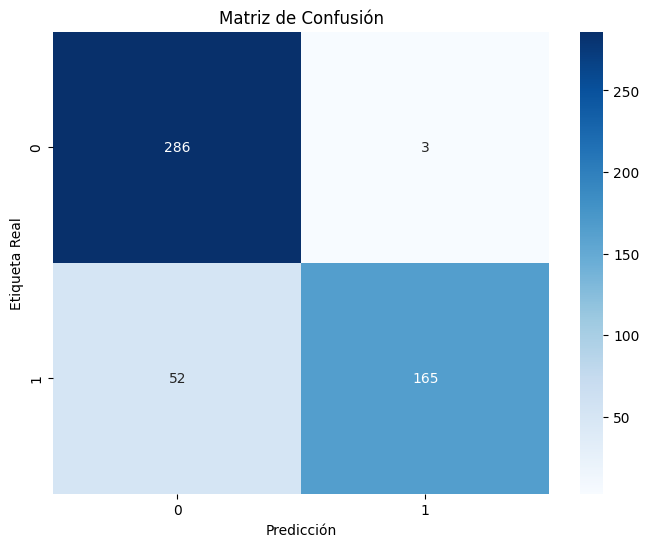

In [5]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from lightgbm import LGBMClassifier


#Construcción del modelo
df = pd.read_excel("C:\\Users\\klgt1\\Downloads\\dataset_BALANCEADO.xlsx")

# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('CONDUCTA', axis=1)
y = df['CONDUCTA']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la grilla de hiperparámetros a buscar
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [20, 50, 100],
    'num_leaves': [20, 31, 40],
    'max_depth': [5, 20, 50],
    'subsample': [0.8, 0.9, 1.0],
    'feature_fraction': [0.6, 0.7, 0.8],
    'min_child_samples': [10, 20, 30]
}

# Inicializar el modelo LGBMClassifier
lgbm_model = LGBMClassifier()

# Realizar la búsqueda exhaustiva de hiperparámetros
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, scoring='precision', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

best_score = grid_search.best_score_
print("Mejor score encontrado:", best_score)

# Utilizar el mejor modelo encontrado
best_lgbm_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_lgbm_model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'\nPrecisión del modelo: {precision * 100:.2f}%')
print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Recall del modelo: {recall * 100:.2f}%')
print(f'F1-score del modelo: {f1 * 100:.2f}%')

# Construir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=best_lgbm_model.classes_, yticklabels=best_lgbm_model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()